In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (5,5)


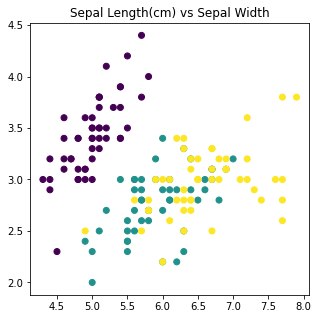

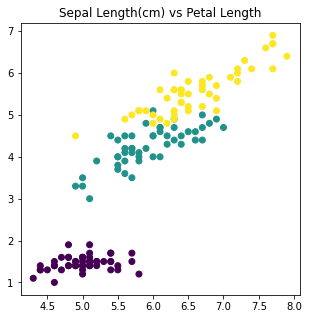

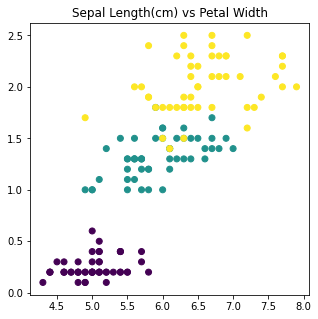

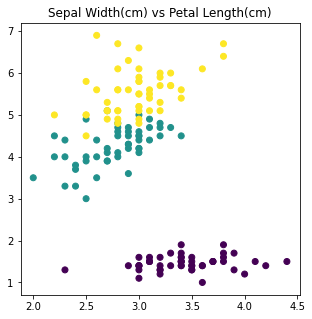

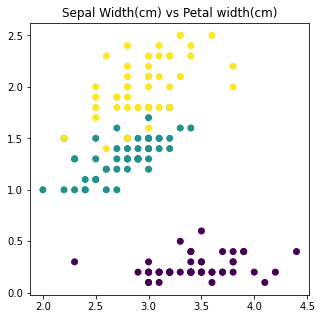

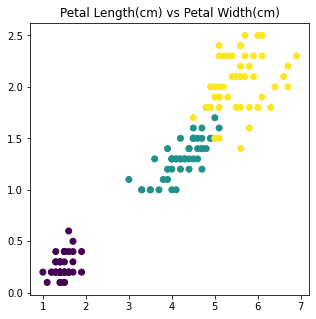

In [82]:
iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data)
feature, target = iris.data, iris.target
X=df.iloc[:,0]
Y=df.iloc[:,1]
fig = plt.subplots()
plt.title('Sepal Length(cm) vs Sepal Width')
plt.scatter(X,Y,c=target)
plt.show()

X=df.iloc[:,0]
Y=df.iloc[:,2]
fig = plt.subplots()
plt.title('Sepal Length(cm) vs Petal Length')
plt.scatter(X,Y,c=target)
plt.show()

X=df.iloc[:,0]
Y=df.iloc[:,3]
fig = plt.subplots()
plt.title('Sepal Length(cm) vs Petal Width')
plt.scatter(X,Y,c=target)
plt.show()

X=df.iloc[:,1]
Y=df.iloc[:,2]
fig = plt.subplots()
plt.title('Sepal Width(cm) vs Petal Length(cm)')
plt.scatter(X,Y,c=target)
plt.show()

X=df.iloc[:,1]
Y=df.iloc[:,3]
fig = plt.subplots()
plt.title('Sepal Width(cm) vs Petal width(cm)')
plt.scatter(X,Y,c=target)
plt.show()

X=df.iloc[:,2]
Y=df.iloc[:,3]
fig = plt.subplots()
plt.title('Petal Length(cm) vs Petal Width(cm)')
plt.scatter(X,Y,c=target)
plt.show()







# <b>As is clearly seen that Setosa Samples(in magenta) are clearly visible from Versi Color and Virginica</b>

In [83]:
feature

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
feature_train, feature_test, target_train, target_test = train_test_split(feature,target,test_size = 0.1, random_state = 42)    
print(len(feature_train), len(feature_test))
feature_names = iris.feature_names
print(feature_names)

# Linear Regression : below built model will predict combination of any two features. like for the first example it is Sepal Width and Sepal Length

In [143]:
class LR():
    def __init__(self, b = 0):      #b = bias
        self.b = b
        self.weights = None
        
    def fit(self,X, Y, epochs = 100, batch = 32, lr = 0.01):
        n_columns = X.shape[1]      #number of columns in training set
        n_rows = X.shape[0]         #number of rows in training set
        
        weights = np.ones(shape = (n_columns))             #initialization of weight as 1 and bias as 0
        #for storing recorded loss
        l_mse =[]                      
        l_steps=[]
        
        #creating local variable
        b=self.b
        
        n_batch = int(n_rows/batch)    #no. of batches
        
        for j in range(epochs):
            #generate random values of size n_rows= 135
            random_val = np.random.permutation(n_rows)
            
            Xtmp = X[random_val]
            Ytmp = Y[random_val]
            
            for i in range(0, n_rows, batch):
                X_bat = Xtmp[i : i+batch]       #creatig batches for feature and target
                Y_bat = Ytmp[i : i+batch]
                
                Y_pred = (weights @ X_bat.T) + b
                
                #new weight and bias
                new_weights = - (2 / len(X_bat) ) * (X_bat.T @ ( Y_bat - Y_pred))
                new_b = - ( 2 / len(X_bat))*np.sum(Y_bat - Y_pred)
                
                #updating weights and bias
                weights = weights - lr * new_weights
                b = b - lr * new_b
                
                #Mean squared Error
                mse = np.mean( ( Y_bat - Y_pred)**2)
                
            #appending mse of current batch to a list
            l_mse.append(mse)
            l_steps.append(j)
            
        return weights, b, mse, l_mse, l_steps
    
    def predict(self, X, weights, b):
        #creating an empty list for predictions
        preds = []
        l=len(X)
        
        for i in range(l):
            Y_pred = weights * X[i] + b
            preds.append(Y_pred)
            
        return preds
    
    def loss_plt(self, l_mse, l_steps):
        plt.figure(figsize=(8,8))
        plt.plot(l_steps,l_mse)
        plt.scatter(l_steps, l_mse, marker= "*", cmap='Greens', edgecolors= 'Red')
        plt.xlabel("Steps", fontsize=10)
        plt.ylabel("Loss", fontsize = 12)
        plt.show()
        plt.show()
        
    def accuracy(self, y_pred, y):
        loss = np.mean((y-y_pred)**2)
        return loss      
        
    

<b>comp1 = Comparision1</b> : <i>Sepal Length vs. Sepal Width</i>

Weight =  [0.44078973]
bias =  0.5195844621259024
MSE =  0.3478864968364578


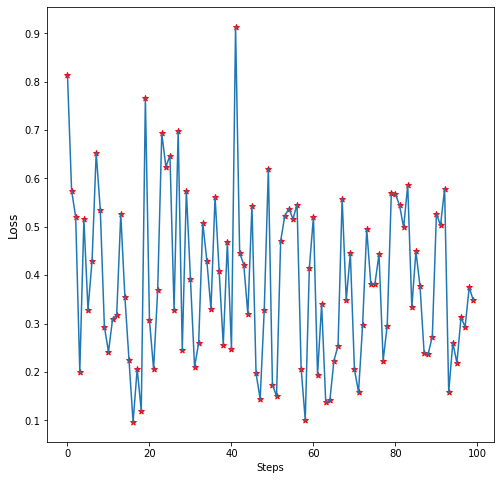

In [144]:
comp1 = LR()
w1, b1,mse1, l_mse1, l_steps1 = comp1.fit(feature_train[:,0:1], feature_train[:,1])
print("Weight = ", w1)
print("bias = ", b1)
print("MSE = ", mse1)
comp1.loss_plt(l_mse1, l_steps1)

<b>comp2 = Comparision2</b> : <i>Sepal Length vs. Petal Length</i>

Weight =  [0.91288512]
bias =  -1.2746888681643065
MSE =  0.9402027907842821


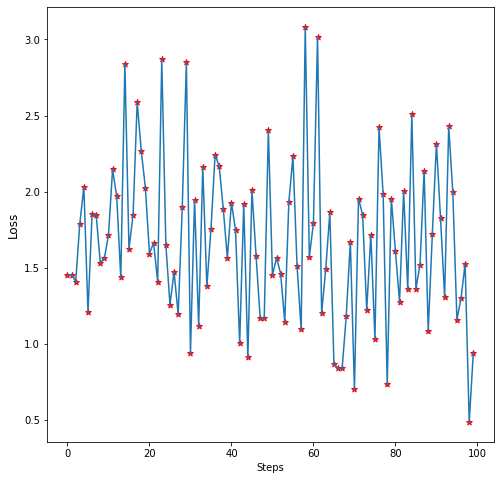

In [146]:
comp2 = LR()
w2, b2,mse2, l_mse2, l_steps2 = comp2.fit(feature_train[:,0:1], feature_train[:,2])
print("Weight = ", w2)
print("bias = ", b2)
print("MSE = ", mse2)
comp2.loss_plt(l_mse2, l_steps2)

<b>comp3 = Comparision3</b> : <i>Sepal Length vs. Petal Width</i>

Weight =  [0.31993442]
bias =  -0.6584733665568718
MSE =  0.14704969049295685


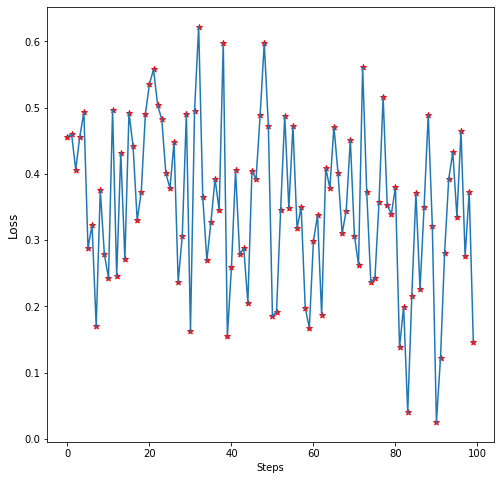

In [147]:
comp3 = LR()
w3, b3,mse3, l_mse3, l_steps3 = comp3.fit(feature_train[:,0:1], feature_train[:,3])
print("Weight = ", w3)
print("bias = ", b3)
print("MSE = ", mse3)
comp3.loss_plt(l_mse3, l_steps3)

<b>comp4 = Comparision4</b> : <i>Sepal Width vs. Petal Length</i>

Weight =  [0.71882137]
bias =  1.4924405469735147
MSE =  2.2337398125615135


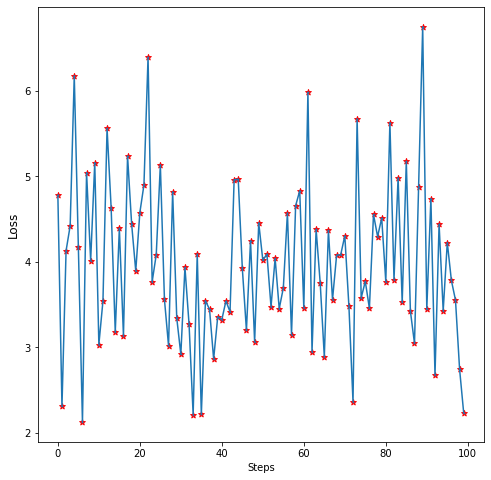

In [148]:
comp4 = LR()
w4, b4,mse4, l_mse4, l_steps4 = comp4.fit(feature_train[:,1:2], feature_train[:,2])
print("Weight = ", w4)
print("bias = ", b4)
print("MSE = ", mse4)
comp4.loss_plt(l_mse4, l_steps4)

<b>comp5 = Comparision5</b> : <i>Sepal Width vs. Petal Width</i>

Weight =  [0.26854108]
bias =  0.35922989419569246
MSE =  0.7843642576977053


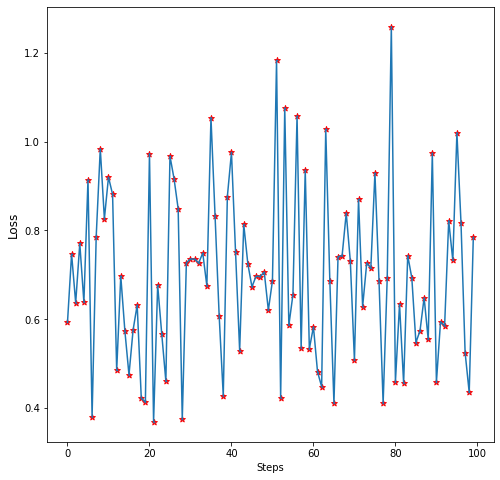

In [149]:
comp5 = LR()
w5, b5,mse5, l_mse5, l_steps5 = comp5.fit(feature_train[:,1:2], feature_train[:,3])
print("Weight = ", w5)
print("bias = ", b5)
print("MSE = ", mse5)
comp5.loss_plt(l_mse5, l_steps5)

<b>comp6 = Comparision6</b> : <i>Petal Length vs. Petal Width</i>

Weight =  [0.40415064]
bias =  -0.3224312008174445
MSE =  0.020385504477529032


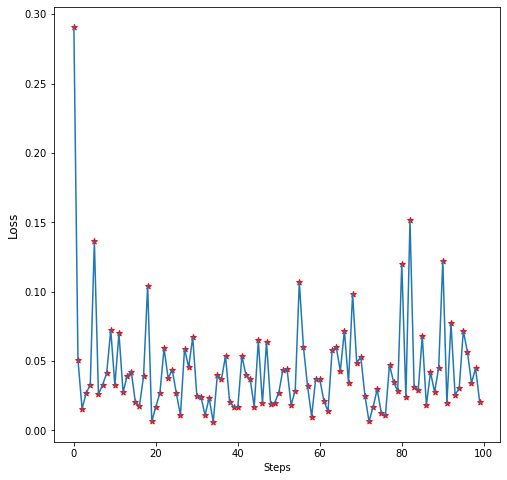

In [150]:
comp6 = LR()
w6, b6,mse6, l_mse6, l_steps6 = comp6.fit(feature_train[:,2:3], feature_train[:,3])
print("Weight = ", w6)
print("bias = ", b6)
print("MSE = ", mse6)
comp6.loss_plt(l_mse6, l_steps6)

<b>comp7 = Comparision7</b> : <i>Sepal Width vs. Sepal Length</i>

Weight =  [1.46660679]
bias =  1.2582857801703795
MSE =  0.7731879846974483


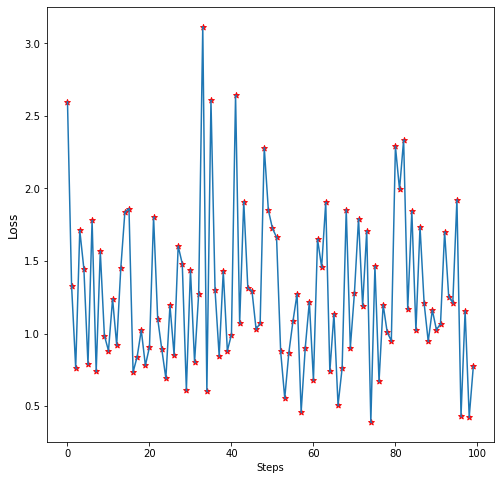

In [165]:
comp7 = LR()
w7, b7,mse7, l_mse7, l_steps7 = comp7.fit(feature_train[:,1:2], feature_train[:,0])
print("Weight = ", w7)
print("bias = ", b7)
print("MSE = ", mse7)
comp7.loss_plt(l_mse7, l_steps7)

<b>comp8 = Comparision8</b> : <i>Petal Length vs. Sepal Length</i>

Weight =  [0.58082212]
bias =  3.482859217132638
MSE =  0.3292252790142247


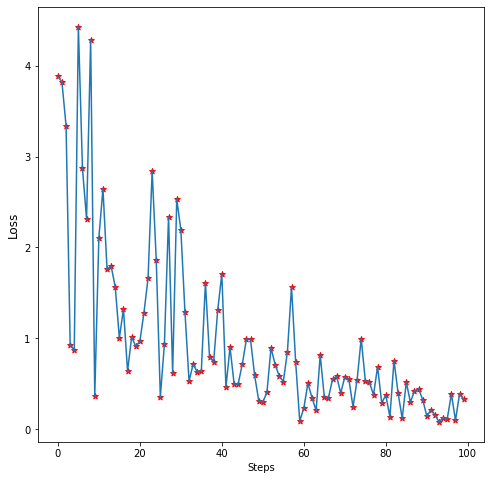

In [166]:
comp8 = LR()
w8, b8,mse8, l_mse8, l_steps8 = comp8.fit(feature_train[:,2:3], feature_train[:,0])
print("Weight = ", w8)
print("bias = ", b8)
print("MSE = ", mse8)
comp8.loss_plt(l_mse8, l_steps8)

<b>comp9 = Comparision9</b> : <i>Petal Width vs. Sepal Length</i>

Weight =  [1.17324296]
bias =  4.299304472645702
MSE =  0.16221558450647205


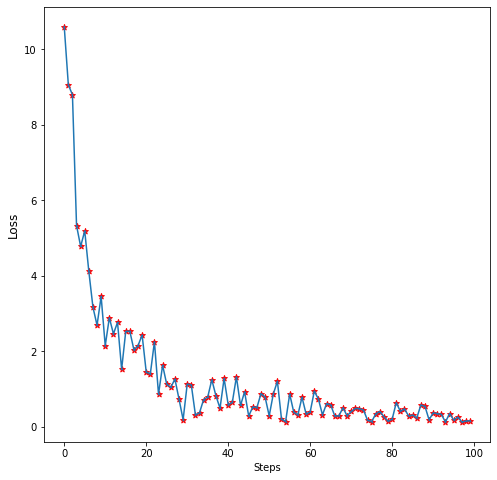

In [167]:
comp9 = LR()
w9, b9,mse9, l_mse9, l_steps9 = comp9.fit(feature_train[:,3:], feature_train[:,0])
print("Weight = ", w9)
print("bias = ", b9)
print("MSE = ", mse9)
comp9.loss_plt(l_mse9, l_steps9)

<b>comp10 = Comparision10</b> : <i>Petal Length vs. Sepal Width</i>

Weight =  [0.02000081]
bias =  2.8000697258612632
MSE =  0.08107477340347333


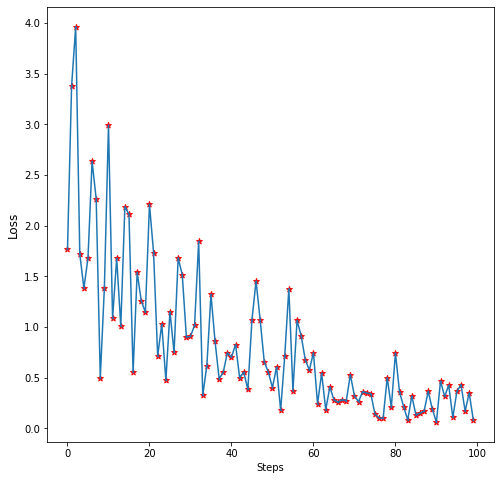

In [168]:
comp10 = LR()
w10, b10,mse10, l_mse10, l_steps10 = comp10.fit(feature_train[:,2:3], feature_train[:,1])
print("Weight = ", w10)
print("bias = ", b10)
print("MSE = ", mse10)
comp10.loss_plt(l_mse10, l_steps10)

<b>comp11 = Comparision11</b> : <i>Petal Width vs. Sepal Width</i>

Weight =  [0.05443743]
bias =  2.914735545885103
MSE =  0.22852738459507219


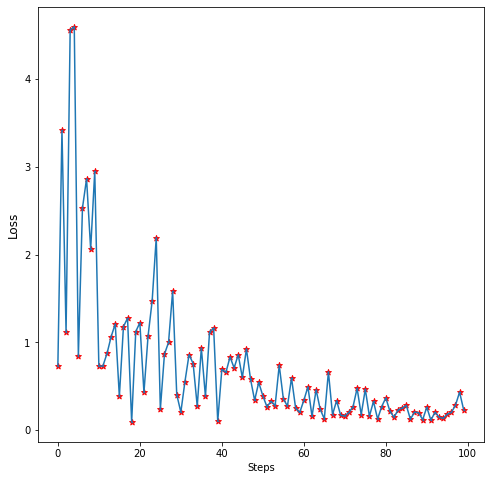

In [169]:
comp11 = LR()
w11, b11,mse11, l_mse11, l_steps11 = comp11.fit(feature_train[:,3:], feature_train[:,1])
print("Weight = ", w11)
print("bias = ", b11)
print("MSE = ", mse11)
comp11.loss_plt(l_mse11, l_steps11)

<b>comp12 = Comparision12</b> : <i>Petal Width vs. Petal Length</i>

Weight =  [2.26178809]
bias =  1.056981902079457
MSE =  0.257797960594524


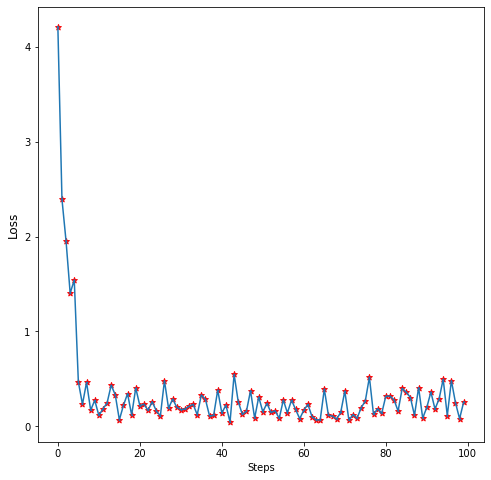

In [170]:
comp12 = LR()
w12, b12,mse12, l_mse12, l_steps12 = comp12.fit(feature_train[:,3:], feature_train[:,2])
print("Weight = ", w12)
print("bias = ", b12)
print("MSE = ", mse12)
comp12.loss_plt(l_mse12, l_steps12)

In [171]:
Losses=[]       #creating a list of losses

<b>2.3 Testing</b>

<b>comp1 = Comparision1</b> : <i>Sepal Width vs. Sepal Length</i>

In [172]:
pred1 = comp1.predict(feature_test[:,0:1], w1, b1)
loss1 = comp1.accuracy(pred1, feature_test[:,1])
Losses.append(loss1)
print("MSE = ", loss1)

MSE =  0.30219517312481914


<b>comp2 = Comparision2</b> : <i>Sepal Length vs. Petal Length</i>

In [174]:
pred2 = comp2.predict(feature_test[:,0:1], w2, b2)
loss2 = comp2.accuracy(pred2, feature_test[:,2])
Losses.append(loss2)
print("MSE = ", loss2)

MSE =  4.048955504215202


<b>comp3 = Comparision3</b> : <i>Sepal Length vs. Petal Width</i>

In [175]:
pred3 = comp3.predict(feature_test[:,0:1], w3, b3)
loss3 = comp3.accuracy(pred3, feature_test[:,3])
Losses.append(loss3)
print("MSE = ", loss3)

MSE =  0.6706279869057783


<b>comp4 = Comparision4</b> : <i>Sepal Width vs. Petal Length</i>

In [176]:
pred4 = comp4.predict(feature_test[:,1:2], w4, b4)
loss4 = comp4.accuracy(pred4, feature_test[:,2])
Losses.append(loss4)
print("MSE = ", loss4)

MSE =  3.238457172002401


<b>comp5 = Comparision5</b> : <i>Sepal Width vs. Petal Width</i>

In [177]:
pred5 = comp5.predict(feature_test[:,1:2], w5, b5)
loss5 = comp5.accuracy(pred5, feature_test[:,3])
Losses.append(loss5)
print("MSE = ", loss5)

MSE =  0.6061258419534763


<b>comp6 = Comparision6</b> : <i>Petal Length vs. Petal Width</i>

In [178]:
pred6 = comp6.predict(feature_test[:,2:3], w6, b6)
loss6 = comp6.accuracy(pred6, feature_test[:,3])
Losses.append(loss6)
print("MSE = ", loss6)

MSE =  1.0878223783002228


<b>comp7 = Comparision7</b> : <i>Sepal Width vs. Sepal Length</i>

In [179]:
pred7 = comp7.predict(feature_test[:,1:2], w7, b7)
loss7 = comp7.accuracy(pred7, feature_test[:,0])
Losses.append(loss7)
print("MSE = ", loss7)

MSE =  1.0211537646709998


<b>comp8 = Comparision8</b> : <i>Petal Length vs. Sepal Length</i>

In [180]:
pred8 = comp8.predict(feature_test[:,2:3], w8, b8)
loss8 = comp8.accuracy(pred8, feature_test[:,0])
Losses.append(loss8)
print("MSE = ", loss8)

MSE =  1.8312362484161238


<b>comp9 = Comparision9</b> : <i>Petal Width vs. Sepal Length</i>

In [181]:
pred9 = comp9.predict(feature_test[:,3:], w9, b9)
loss9 = comp9.accuracy(pred9, feature_test[:,0])
Losses.append(loss9)
print("MSE = ", loss9)

MSE =  1.5370529497183683


<b>comp10 = Comparision10</b> : <i>Petal Length vs. Sepal Width</i>

In [182]:
pred10 = comp10.predict(feature_test[:,2:3], w10, b10)
loss10 = comp10.accuracy(pred10, feature_test[:,1])
Losses.append(loss10)
print("MSE = ", loss10)

MSE =  0.21489038897640525


<b>comp11 = Comparision11</b> : <i>Petal Width vs. Sepal Width</i>

In [183]:
pred11 = comp11.predict(feature_test[:,3:], w11, b11)
loss11 = comp11.accuracy(pred11, feature_test[:,1])
Losses.append(loss11)
print("MSE = ", loss11)

MSE =  0.18797376209424216


<b>comp12 = Comparision12<b> : <i>Petal Width vs. Petal Length</i>

In [184]:
pred12 = comp12.predict(feature_test[:,3:], w12, b12)
loss12 = comp12.accuracy(pred12, feature_test[:,2])
Losses.append(loss12)
print("MSE = ", loss12)

MSE =  6.074313261515148


In [185]:
Losses
x=min(Losses)             #finding out the minimum loss amongst all the testing losses
x

0.18797376209424216

# <b>Least MSE = 0.18 (Petal Width vs Sepal Width), So, Sepal Width can be most accurately predicted by Petal Width</b>